Model Accuracy: 0.6863636363636364


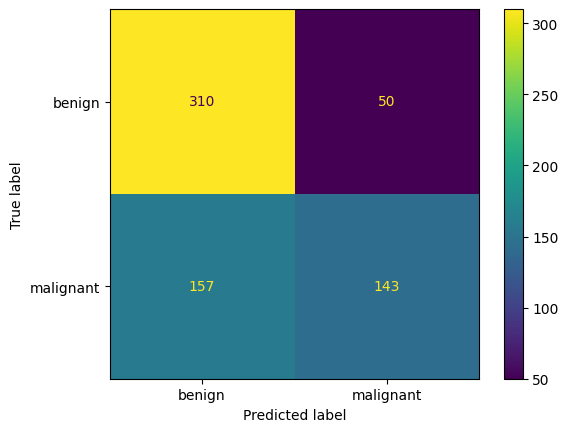

In [1]:
import os
import pickle
import skimage as ski
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prepare data
dataDirectory = '/content/drive/MyDrive/Colab Notebooks/NSDP_Project/Dataset'
trainDirectory = '/content/drive/MyDrive/Colab Notebooks/NSDP_Project/Dataset/train'
testDirectory = '/content/drive/MyDrive/Colab Notebooks/NSDP_Project/Dataset/val'

data = {}

# i will be 0 in the first iteration and 1 in the second
# directory will be trainDirectory in the first iteration and testDirectory in the second
for i, directory in enumerate([trainDirectory, testDirectory]):
    features = []
    labels = []
    for category in os.listdir(directory):
        for image_path in os.listdir(os.path.join(directory, category)):
            image_path = os.path.join(directory, category, image_path)
            the_image = Image.open(image_path)

            the_image_features = ski.feature.hog(the_image, orientations=9, pixels_per_cell=(8, 8),
                                                 cells_per_block=(3, 3), block_norm='L2-Hys', visualize=False,
                                                 transform_sqrt=False, feature_vector=True, channel_axis=-1)

            features.append(the_image_features)
            labels.append(category)

    data[['training_data', 'validation_data'][i]] = features
    data[['training_labels', 'validation_labels'][i]] = labels

# Train Model
model = RandomForestClassifier(random_state=0)
model.fit(data['training_data'], data['training_labels'])

# Test model
y_pred = model.predict(data['validation_data'])
accuracy = accuracy_score(y_pred, data['validation_labels'])
print('Model Accuracy:', accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(data['validation_labels'], y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot()
plt.show()

# Save the model
with open('./model.p', 'wb') as f:
    pickle.dump(model, f)
